In [42]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image

In [43]:
# https://github.com/deepinsight/insightface/tree/master/model_zoo
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/brianbianchi/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/brianbianchi/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/brianbianchi/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/brianbianchi/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/brianbianchi/.insightface/models/buffalo_l/w600k_r50.onnx recognition [

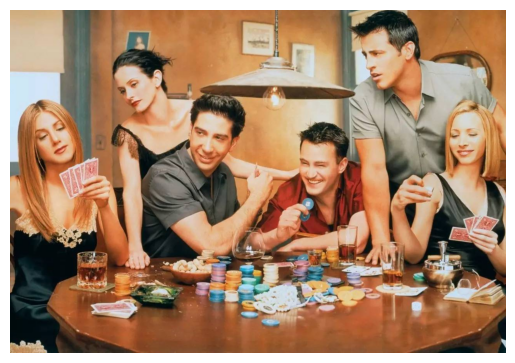

In [44]:
img = get_image('t1')
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.show()

In [45]:
faces = app.get(img)

In [46]:
len(faces)

6

In [47]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

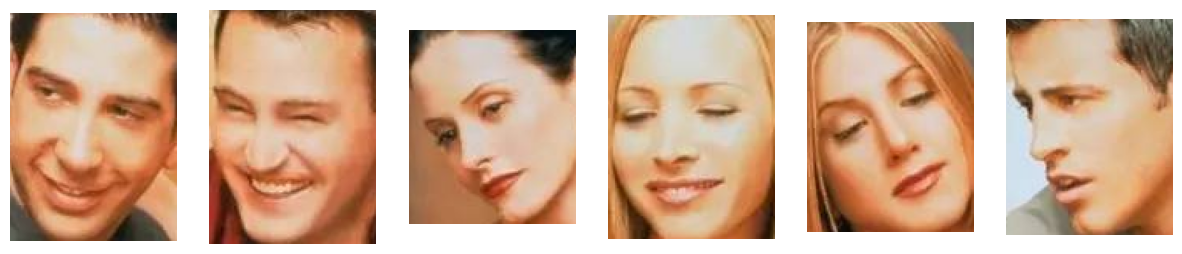

In [48]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    axs[i].axis('off')

In [49]:
# https://huggingface.co/ezioruan/inswapper_128.onnx/blob/main/inswapper_128.onnx
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip= False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [50]:
res = img.copy()
joey = faces[5]
for face in faces:
    res = swapper.get(res, face, joey, paste_back=True)

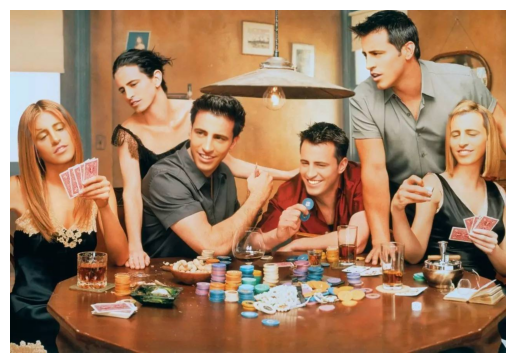

In [51]:
plt.imshow(res[:,:,::-1])
plt.axis('off')
plt.show()

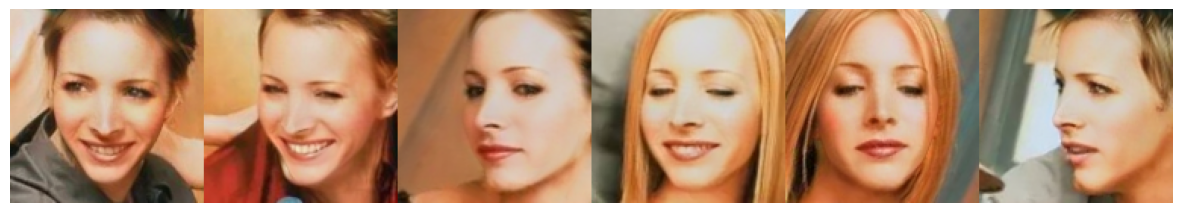

In [55]:
phoebe = faces[3]
res = []
for face in faces:
    _img, _ = swapper.get(img, face, phoebe, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, axs = plt.subplots(figsize=(15,5))
axs.imshow(res[:,:,::-1])
axs.axis('off')
plt.show()